In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


C:\Users\User\AppData\Local\Temp/ipykernel_11100/2478512389.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_column'] = df.index
C:\Users\User\AppData\Local\Temp/ipykernel_11100/2478512389.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_column'] = pd.to_datetime(df['date_column'])


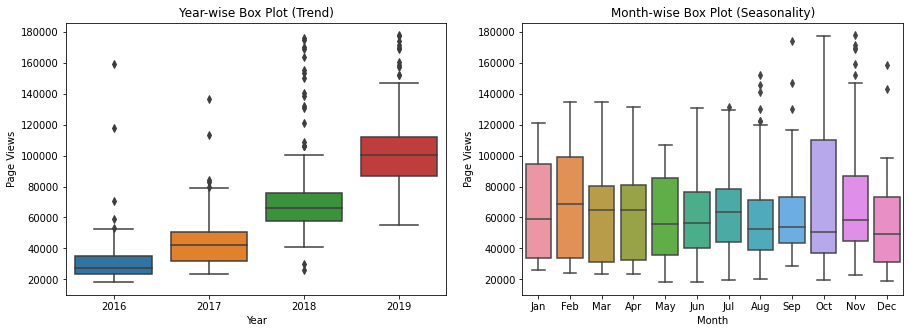

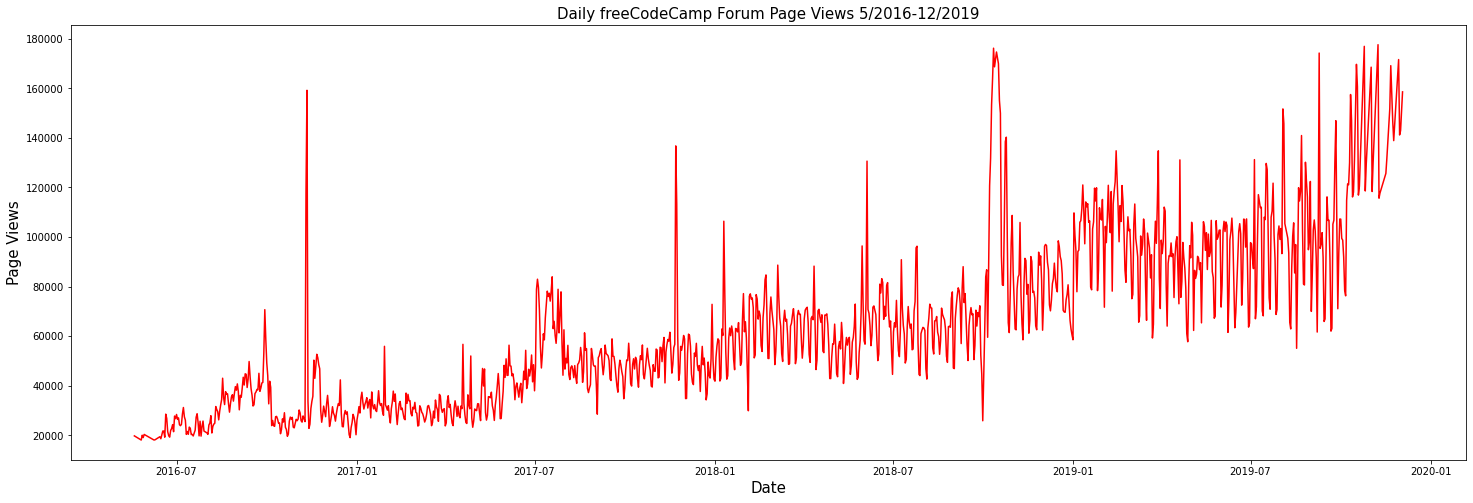

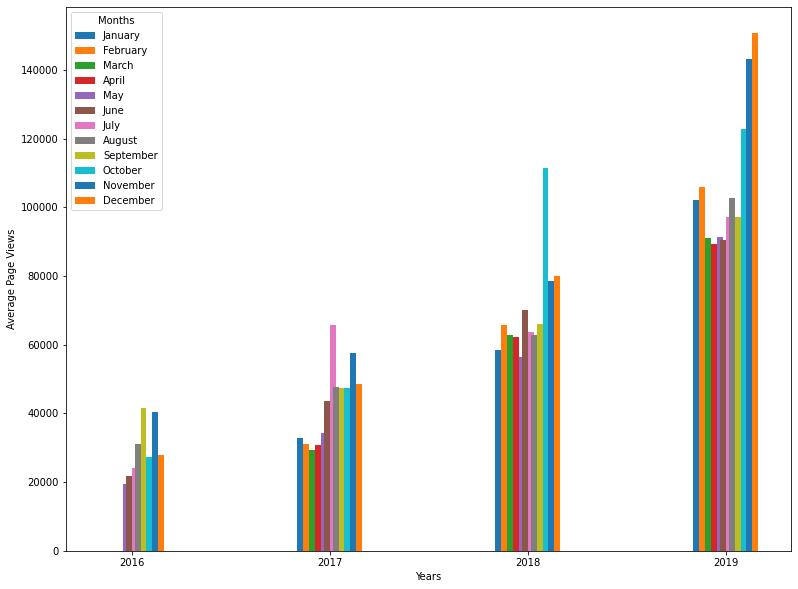

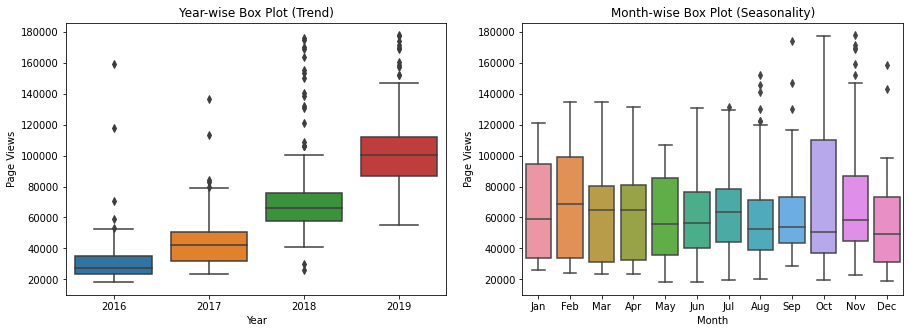

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
import numpy as np

df = pd.read_csv('fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df['date'])

#print(df.dtypes)


df.set_index('date', inplace=True)
df.columns = ['page_views']
#print(df.info)

df2 = df[df['page_views'] > df['page_views'].quantile(0.025)]
df = df2
df3 = df[df['page_views'] < df['page_views'].quantile(0.9745)]
#remains to be seen if df has been modified in place like this


 



# Clean data
df = df3
#print(df.info)
#print(df.head())

def draw_line_plot():
    # Draw line plot
    
    fig, ax = plt.subplots(figsize=(25,8))
    plt.plot(df, color='red')
    plt.xlabel('Date', fontsize=15)
    plt.ylabel('Page Views', fontsize=15)
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019', fontsize=15)
    
    #plt.show()
    

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig



def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df['date_column'] = df.index
    df['date_column'] = pd.to_datetime(df['date_column'])
    #df['days_in_month'] = df['date_column'].dt.days_in_month
    #df['month'] = df['date_column'].dt.strftime('%m.%Y')
    #df2 = df.groupby(pd.Grouper(key='month')).mean()
    df2 = df.groupby(pd.Grouper(key='date_column', freq='1M')).mean()
    df2['date_column'] = df2.index
    df2['month'] = pd.to_datetime(df2['date_column'], format='%m').dt.month_name()
    df2['year'] = df2['date_column'].dt.year
    #print(df2)
    #!!! we are missing jan-april of 2016 , may 2016 is the first month
    

    january = df2.loc[df2['month']== 'January', 'page_views'].tolist()
    february = df2.loc[df2['month']== 'February', 'page_views'].tolist()
    march = df2.loc[df2['month']== 'March', 'page_views'].tolist()
    april = df2.loc[df2['month']== 'April', 'page_views'].tolist()
    may = df2.loc[df2['month']== 'May', 'page_views'].tolist()
    june = df2.loc[df2['month']== 'June', 'page_views'].tolist()
    july = df2.loc[df2['month']== 'July', 'page_views'].tolist()
    august = df2.loc[df2['month']== 'August', 'page_views'].tolist()
    september = df2.loc[df2['month']== 'September', 'page_views'].tolist()
    october = df2.loc[df2['month']== 'October', 'page_views'].tolist()
    november = df2.loc[df2['month']== 'November', 'page_views'].tolist()
    december = df2.loc[df2['month']== 'December', 'page_views'].tolist()
    missing_value = 0
    january.insert(0, missing_value)
    february.insert(0, missing_value)
    march.insert(0, missing_value)
    april.insert(0, missing_value)
    #print(january)
    
    df_bar = None

    # Draw bar plot
    # THE PLOT
    labels = ['2016', '2017', '2018', '2019']
    x = np.arange(4)
    width = 0.03
    width2 = 0.03
    fig, ax = plt.subplots(figsize=(13,10))
    line1 = ax.bar(x-width*5, january, width2, label='January')
    line2 = ax.bar(x-width*4, february, width2, label='February')
    line3 = ax.bar(x-width*3, march, width2, label='March')
    line4 = ax.bar(x-width*2, april, width2, label='April')
    line5 = ax.bar(x-width, may, width2, label='May')
    line6 = ax.bar(x-width/2, june, width2, label='June')
    line7 = ax.bar(x+width/2, july, width2, label='July')
    line8 = ax.bar(x+width, august, width2, label='August')
    line9 = ax.bar(x+width*2, september, width2, label='September')
    line10 = ax.bar(x+width*3, october, width2, label='October')
    line11 = ax.bar(x+width*4, november, width2, label='November')
    line12 = ax.bar(x+width*5, december, width2, label='December')
    ax.set_ylabel('Average Page Views')
    ax.set_xlabel('Years')
    ax.set_xticks(x, labels)
    ax.legend(title='Months')
    
    

    

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # my code starts here
    
    #months = ['January','February','March','April','May','June','July','August','September','October','November',
    #            'December']
    #month_dict = {'January':int(1),'February':int(2),'March':int(3),'April':int(4),'May':int(5),'June':int(6),
    #    'July':int(7),'August':int(8), 'September':int(9),'October':int(10),'November':int(11), 'December':int(12)}
    #df_box['month_number'] = None
    #df_box['month_number'] = df_box['month'].map(month_dict)
    #df_box['month_number'] = datetime.datetime.strptime(df_box['month'], '%B')
    
    
    df_box['month_number'] = pd.DatetimeIndex(df_box['date']).month
    df_box.sort_values(by='month_number', ascending=True, inplace=True)
    #print(df_box.head())
    # Draw box plots (using Seaborn)

    fig, axs = plt.subplots(ncols=2, figsize=(15,5))
    


    sns.boxplot(x='year', y='page_views', data=df_box, ax=axs[0]).set(xlabel='Year', ylabel='Page Views'
            , title='Year-wise Box Plot (Trend)')


    sns.boxplot(x='month', y='page_views', data=df_box, ax=axs[1]).set(xlabel='Month', ylabel='Page Views'
            , title='Month-wise Box Plot (Seasonality)')


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


draw_line_plot()
draw_bar_plot()
draw_box_plot()
#np.arange(5)